In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn plotting style
sns.set_style("dark")

### Load Usahawan dataset

In [5]:

df = pd.read_excel("data/Data Usahawan.xlsx")

# show the first five 
df.head()

,Bil,Nama Usahawan,No K/P,Agensi,Jantina,No Telefon Bimbit,Kategori Usahawan,Syarikat
0,1,SITI ROHANI BT A BAKAR,[820210115206],KETENGAH,Perempuan,[0148073647],"START-UP (ST) - < RM24,000","TEST,TEST2"
1,2,HAJJAH RAZIANA HANIFA,[640716075784],PERDA,Perempuan,[0125109160],PIQO (P) - > RM24k <=RM60k,JASZ TRADING
2,3,PAIRUS BINTI ISMAIL,[760814085704],PERDA,Lelaki,[0175323952],PIQO (P) - > RM24k <=RM60k,FAIRUS SAUJANA ENTRERPRISE
3,4,MUHAMAD AKASYAH BIN KHAIRUDIN,[990105027089],PERDA,Lelaki,[01128400810],PIQO (P) - > RM24k <=RM60k,MUHAMAD AKASYAH BIN KHAIRUDIN
4,5,MOHAMMAD YUSOFF BIN SHAIK ISMAIL,[79123075131],PERDA,Lelaki,[0189424849],MIKRO (M) - > RM150k <= RM300k,MYSIS TRADING


In [6]:
# Drop rows with NaN
df = df.dropna()

### Participants by agency

In [16]:
dff = df["Agensi"].value_counts()

# convert series to dataframe
dff = dff.reset_index()
dff.columns = ['Agensi', 'Freq']

[Text(0, 0, 'MARA'),
 Text(1, 0, 'PERDA'),
 Text(2, 0, 'KESEDAR'),
 Text(3, 0, 'KEMAS'),
 Text(4, 0, 'SPED'),
 Text(5, 0, 'KEDA'),
 Text(6, 0, 'KETENGAH'),
 Text(7, 0, 'KEJORA'),
 Text(8, 0, 'RBC'),
 Text(9, 0, 'BDA'),
 Text(10, 0, 'PKPP')]

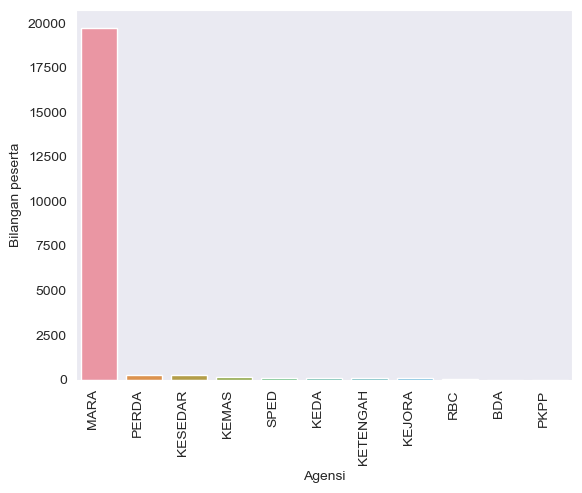

In [34]:
# bar plot of frequency
ax = sns.barplot(x = "Agensi", y = "Freq", data = dff)

# configure plot labels
ax.set(xlabel="Agensi", ylabel="Bilangan peserta")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

<Axes: ylabel='Agensi'>

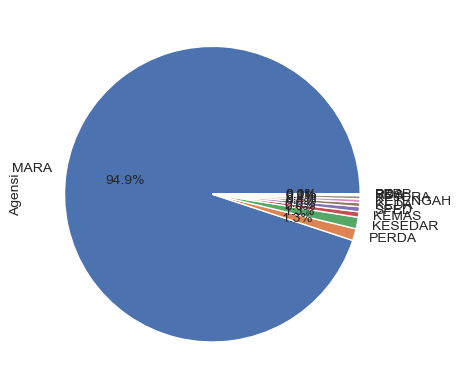

In [36]:
#seaborn library
colors = sns.color_palette("deep")[0:10]

df["Agensi"].value_counts().plot(kind="pie", colors=colors, autopct="%.1f%%")

### Participants by category

In [37]:
dff = df["Kategori Usahawan"].value_counts()

# convert series to dataframe
dff = dff.reset_index()
dff.columns = ["Kategori Usahawan", 'Freq']

[Text(0, 0, 'START-UP (ST) - < RM24,000'),
 Text(1, 0, 'PIQO (P) - > RM24k <=RM60k'),
 Text(2, 0, 'MIKRO (M) - > RM150k <= RM300k'),
 Text(3, 0, 'NANO (N) - > RM60k<= RM150k'),
 Text(4, 0, 'KECIL (K) - > RM300k <=RM15j'),
 Text(5, 0, 'SEDERHANA (S) - > RM15j <= RM50j')]

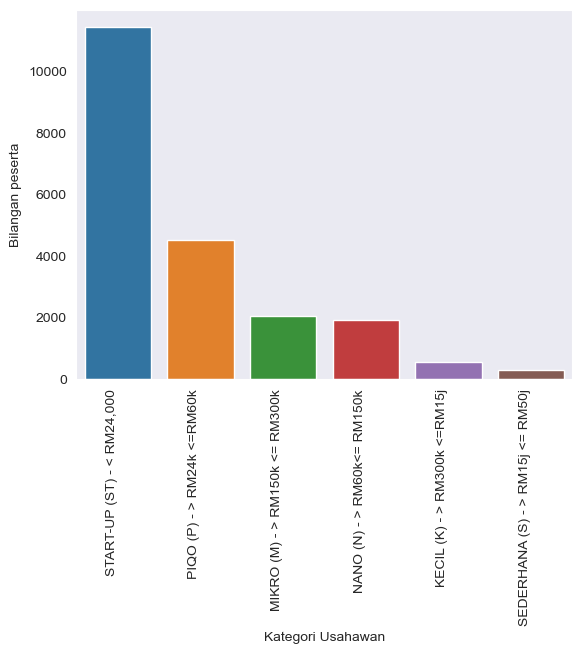

In [38]:
# bar plot of frequency
ax = sns.barplot(x = "Kategori Usahawan", y = "Freq", data = dff)

# configure plot labels
ax.set(xlabel="Kategori Usahawan", ylabel="Bilangan peserta")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

<Axes: ylabel='Kategori Usahawan'>

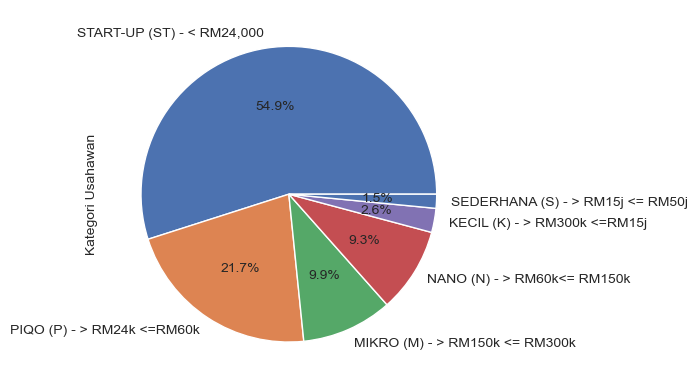

In [39]:
#seaborn library
colors = sns.color_palette("deep")[0:5]

df["Kategori Usahawan"].value_counts().plot(kind="pie", colors=colors, autopct="%.1f%%")

### Participant age

In [43]:
# Processing age by IC number
ic = df["No K/P"].str.strip('[]')
df["Umur"] = ic.astype(str).str[:2]
df = df[pd.to_numeric(df["Umur"], errors='coerce').notnull()]
df.head()

,Bil,Nama Usahawan,No K/P,Agensi,Jantina,No Telefon Bimbit,Kategori Usahawan,Syarikat,Umur
0,1,SITI ROHANI BT A BAKAR,[820210115206],KETENGAH,Perempuan,[0148073647],"START-UP (ST) - < RM24,000","TEST,TEST2",82
1,2,HAJJAH RAZIANA HANIFA,[640716075784],PERDA,Perempuan,[0125109160],PIQO (P) - > RM24k <=RM60k,JASZ TRADING,64
2,3,PAIRUS BINTI ISMAIL,[760814085704],PERDA,Lelaki,[0175323952],PIQO (P) - > RM24k <=RM60k,FAIRUS SAUJANA ENTRERPRISE,76
3,4,MUHAMAD AKASYAH BIN KHAIRUDIN,[990105027089],PERDA,Lelaki,[01128400810],PIQO (P) - > RM24k <=RM60k,MUHAMAD AKASYAH BIN KHAIRUDIN,99
4,5,MOHAMMAD YUSOFF BIN SHAIK ISMAIL,[79123075131],PERDA,Lelaki,[0189424849],MIKRO (M) - > RM150k <= RM300k,MYSIS TRADING,79


In [44]:
age = df["Umur"].astype(int)
df["Umur"] = abs(2023-age).astype(str).str[-2:].astype(int)

<Axes: xlabel='Umur', ylabel='Count'>

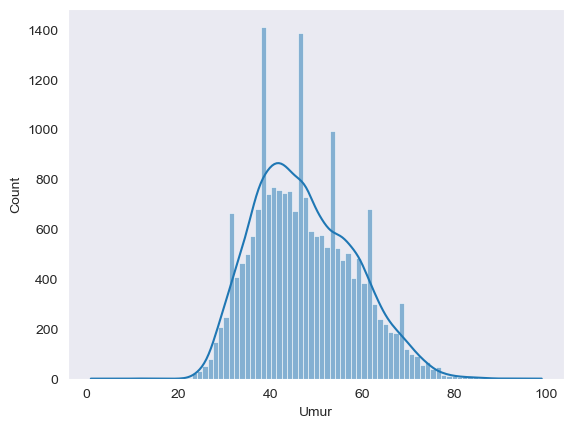

In [42]:
# Age histogram
sns.histplot(data=df["Umur"], kde=True)

<Axes: xlabel='Umur', ylabel='Count'>

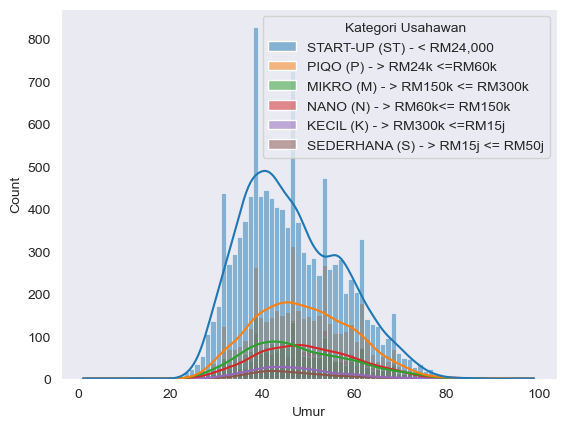

In [47]:
# Age histogram by "Kategory Usahawan"
sns.histplot(data=df, kde=True, x = "Umur", hue = "Kategori Usahawan", multiple="stack")

## KUD Pelangai 2023

In [3]:
# load dataset
df_pel = pd.read_excel("data/Pelangai KUD 2023.xlsx")
# df_pel = pd.read_csv("data/Pelangai KUD 2023.csv")
df_pel.head()

,Time,Nama (First),Nama (Last),Jantina,Umur,Adakah anda mempunyai cadangan/ penambahbaikan?,Negeri,Daerah,Bentuk Penyertaan di KUD,Adakah anda Penerima Manfaat?,...,Pengetahuan berkenaan program latihan keusahawan dibawah ekosistem @ KKDW,Modal untuk memulakan perniagaan,Minat untuk memulakan perniagaan,Usaha dalam memulakan perniagaan,Galakan dalam berkecimpung dalam bidang perniagaan,Pandangan berkenaan keupayaan usahawan dalam persaingan perniagaan,Pandangan berkenaan perundangan dan regulasi dalam mendapatkan bantuan perniagaan,Mempunyai individu yang dijadikan sumber inspirasi,Enumerator,Unique ID
0,2023-09-30 09:05:16,Iqlima,Ibrahim,Perempuan,48.0,Persuade lebih kempe Dan maklumat tenting kkw....,0 = Pahang|,Raub,Pengunjung,Tidak,...,Tiada maklumat berkaitan dengan latihan yang d...,Tidak mempunyai modal,SANGAT BERMINAT untuk berniaga,BERMINAT untuk mencari peluang perniagaan term...,Ada galakan diri sendiri / keluarga untuk berk...,Sukar,Sukar,Mungkin Ada,PEL07,1147459261
1,2023-09-30 09:16:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147461146
2,2023-09-30 10:48:25,Ayub,Atan,Lelaki,75.0,NaN,0 = Johor|,Segamat,Pengunjung,Tidak,...,Tiada maklumat berkaitan dengan latihan yang d...,Mempunyai modal mencukupi,BERMINAT untuk berniaga,BERMINAT untuk mencari peluang perniagaan term...,Ada galakan diri sendiri / keluarga untuk berk...,Mudah,Terlalu sukar,Mungkin Ada,PEL09,1147473574
3,2023-09-30 10:48:38,Muhammad daniel,Haikal,Lelaki,21.0,Tiada kot,0 = Selangor|,Subang,Pengunjung,Tidak,...,Tiada maklumat berkaitan dengan latihan yang d...,Tidak mempunyai modal,BERMINAT untuk berniaga,BERMINAT untuk mencari peluang perniagaan term...,Ada galakan diri sendiri / keluarga untuk berk...,Tidak sukar,Tidak sukar,Mungkin Ada,PEL09,1147473601
4,2023-09-30 10:52:49,Fauzi,Mangga,Lelaki,27.0,NaN,0 = Selangor|,Hulu langat,Pengunjung,Tidak,...,Tiada maklumat berkaitan dengan latihan yang d...,Mempunyai lebihan modal,SANGAT BERMINAT untuk berniaga,BERMINAT untuk mencari peluang perniagaan term...,Tidak mengalakan diri sendiri / keluarga untuk...,Terlalu sukar,Sukar,Tiada,PEL09,1147474130


In [38]:
df_pel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 27 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Time                                                                                504 non-null    object 
 1   Enumerator                                                                          499 non-null    object 
 2   Nama (First)                                                                        502 non-null    object 
 3   Nama (Last)                                                                         502 non-null    object 
 4   Jantina                                                                             502 non-null    object 
 5   Umur                                                                                502 non-null   

In [4]:
# drop rows with no name
df_pel = df_pel.dropna(subset=["Nama (First)"])

<Axes: ylabel='count'>

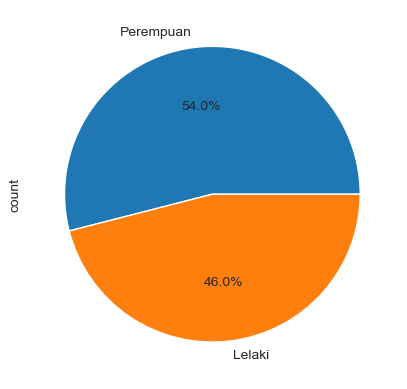

In [5]:
# colors = sns.color_palette("deep")[0:5]

df_pel["Jantina"].value_counts().plot(kind="pie", autopct="%.1f%%")

/Users/faiz/opt/anaconda3/envs/werk/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faiz/opt/anaconda3/envs/werk/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faiz/opt/anaconda3/envs/werk/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faiz/opt/anaconda3/envs/werk/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

[Text(0.5, 1.0, 'Age Group')]

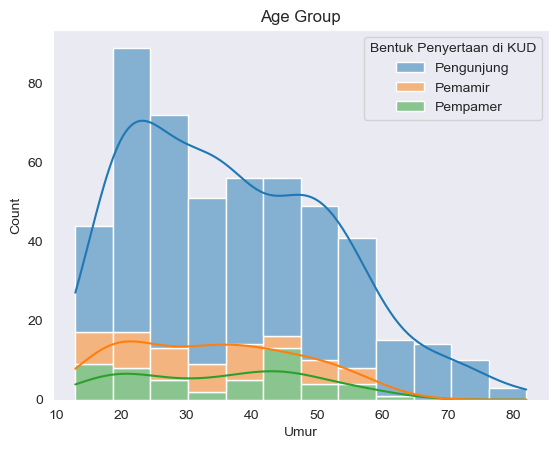

In [6]:
# Age histogram by type of attendance
sns.histplot(data=df_pel, kde=True, x = "Umur", hue="Bentuk Penyertaan di KUD", multiple="stack").set(title="Age Group")

<Axes: ylabel='count'>

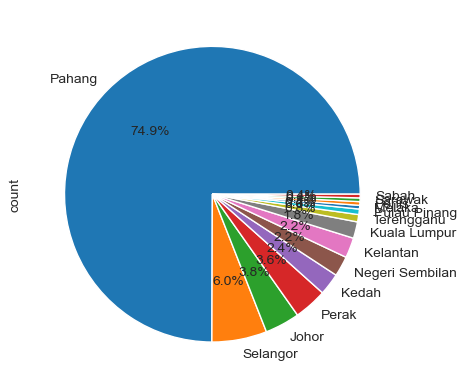

In [7]:
# Remove weird characters
df_pel["Negeri"] = df_pel["Negeri"].str.strip("0  = |")
# Continue to remove weird chars, split and take the first element
df_pel["Negeri"] = df_pel["Negeri"].str.split("|").str[0]

# States pie chart
df_pel["Negeri"].value_counts().plot(kind="pie", autopct="%.1f%%")

/Users/faiz/opt/anaconda3/envs/werk/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faiz/opt/anaconda3/envs/werk/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faiz/opt/anaconda3/envs/werk/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/faiz/opt/anaconda3/envs/werk/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Pahang'),
  Text(1, 0, 'Johor'),
  Text(2, 0, 'Selangor'),
  Text(3, 0, 'Negeri Sembilan'),
  Text(4, 0, 'Kelantan'),
  Text(5, 0, 'Kedah'),
  Text(6, 0, 'Kuala Lumpur'),
  Text(7, 0, 'Pulau Pinang'),
  Text(8, 0, 'Terengganu'),
  Text(9, 0, 'Perak'),
  Text(10, 0, 'Melaka'),
  Text(11, 0, 'Perlis'),
  Text(12, 0, 'Sarawak'),
  Text(13, 0, 'Sabah')])

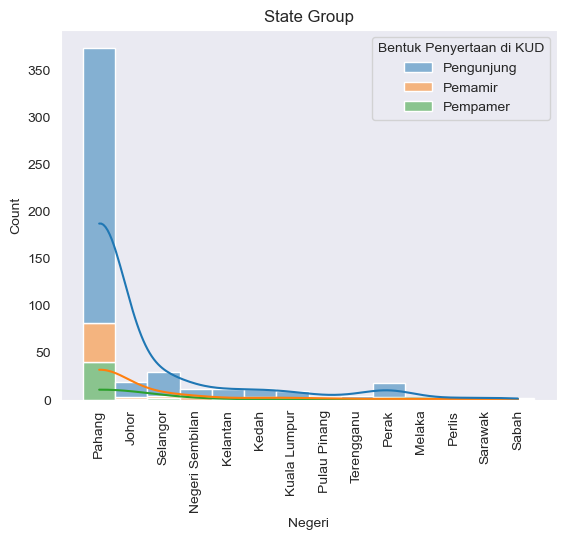

In [22]:
plt.figure()
ax = sns.histplot(data=df_pel, kde=True, x = "Negeri", hue="Bentuk Penyertaan di KUD", multiple="stack").set(title="State Group")
plt.xticks(rotation=90)